In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
voronoi_points = np.array([[-4.98667, -8.66667], [5.01333, -8.66667], [-5.52, -7.01333], [-4.69333, -7.49333], [-5.52, -6.61333], [-4.66667, -6.61333], [-4.4, -7.62667], [-5.84, -6.61333], [-5.52, -6.05333], [-5.25333, -6.34667], [-4.96, -6.34667], [-4.66667, -6.05333], [-6, -6.05333], [-3.81333, -5.84], [-3.57333, -6.05333], [-3.22667, -6.4], [-3.81333, -4.96], [-3.22667, -4.96], [-3.01333, -6.61333], [-2.8, -6.8], [-4.24, -5.52], [-4.26667, -4.61333], [-2.74667, -4.61333], [-2.05333, -6.64], [-4.66667, -5.30667], [-4.77333, -5.25333], [-1.44, -6.45333], [-4.45333, -4.05333], [-2.56, -4.05333], [-5.30667, -4.96], [-5.52, -4.82667], [-4.26667, -3.49333], [-2.74667, -3.49333], [-5.70667, -4.69333], [-3.52, -4.08], [-3.52, -4.08], [-3.49333, -4.05333], [-3.81333, -3.17333], [-3.54667, -4.05333], [-3.54667, -4.05333], [-3.52, -4.08], [-3.52, -4.08], [-3.52, -4.08], [-3.22667, -3.17333], [-5.78667, -4.50667], [0.16, -5.6], [2.45333, -5.57333], [3.09333, -5.57333], [2.45333, -2.48], [3.09333, -2.48], [3.2, -5.57333], [0.56, -5.30667], [-6.05333, -3.54667], [2.77333, -2.16], [0.506667, -5.09333], [2.45333, -1.6], [2.77333, -1.92], [3.09333, -1.6], [-7.94667, -2.05333], [-7.36, -2.4], [-7.92, -1.28], [-7.33333, -1.28], [-8.29333, -1.76], [-6.10667, -2.90667], [-8.37333, -0.933333], [-6.88, -0.933333], [-6.18667, -2.8], [-6.10667, -
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              2.82667], [-8.69333, -1.33333], [-8.82667, -1.09333], [-0.08, -3.22667], [-5.76, -2.42667], [-8.56, -0.4], [-6.69333, -0.4], [-5.36, -2], [-9.06667, -0.586667], [-10, 0], [10, 0], [-0.213333, -2.66667], [5.62667, -2.48], [-8.37333, 0.16], [-6.88, 0.16], [-0.266667, -2.48], [-5.01333, -1.6], [-9.17333, -0.213333], [-7.65333, -0.426667], [-4.98667, -1.54667], [-7.92, 0.48], [-7.65333, -0.4], [-7.65333, -0.4], [-7.65333, -0.4], [-7.65333, -0.4], [-7.62667, -0.4], [-7.62667, -0.4], [-7.62667, -0.4], [-7.33333, 0.48], [-9.2, -0.0266667], [-9.01333, 0.346667], [-4.64, -1.14667], [5.86667, -1.62667], [-0.506667, -1.6], [-8.8, 0.72], [4.56, -0.4], [5.41333, -0.906667], [4.56, 1.52], [5.41333, 1.52], [4.56, 1.52], [5.41333, 1.52], [5.92, -1.30667], [-8.4, 1.14667], [3.09333, 0.293333], [4.98667, 1.94667], [7.22667, 0], [4.56, 2.48], [4.98667, 2.05333], [5.41333, 2.48], [-7.92, 1.49333], [-3.81333, -0.293333], [-0.853333, -0.64], [2.45333, 0.666667], [-7.33333, 1.84], [7.12, 1.52], [-3.22667, 0.373333], [6.88, 2.48], [-1.06667, 0.0533333], [-6.02667, 2.32], [1.17333, 1.52], [-2.82667, 0.88], [-5.22667, 2.50667], [5.38667, 4.29333], [-2.08, 1.76], [4.56, 4.8], [-0.453333, 2.48], [-1.68, 2.18667], [-4.98667, 8.66667], [-1.6, 2.74667], [-1.57333, 2.74667], [-1.22667, 2.85333], [3.12, 5.38667], [5.01333, 8.66667]])

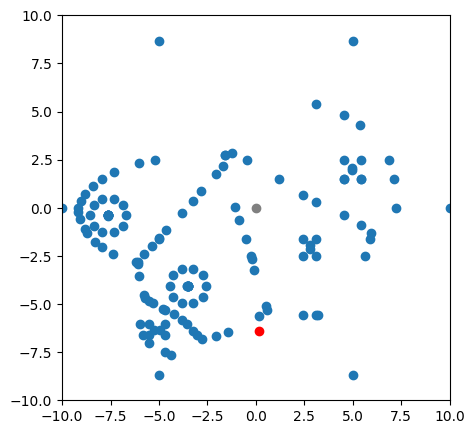

In [12]:
plt.figure(figsize=(5,5))
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(voronoi_points[...,0],voronoi_points[...,1])
plt.scatter(0,0,color='gray')
plt.scatter(.18,-6.42,color='red')

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree, Voronoi, voronoi_plot_2d
import sys
import pathlib

from dijkstra_search import DijkstraSearch

In [28]:

class VoronoiRoadMapPlanner:

    def __init__(self):
        # parameter
        self.N_KNN = 15  # number of edge from one sampled point
        self.MAX_EDGE_LEN = 30.0  # [m] Maximum edge length

    def planning(self, sx, sy, gx, gy, ox, oy, robot_radius):
        obstacle_tree = cKDTree(np.vstack((ox, oy)).T)

        sample_x, sample_y = self.voronoi_sampling(sx, sy, gx, gy, ox, oy)

        plt.plot(ox, oy, ".k")
        plt.plot(sx, sy, "^r")
        plt.plot(gx, gy, "^c")
        plt.grid(True)
        plt.axis("equal")
        plt.plot(sample_x, sample_y, ".b")

        road_map_info = self.generate_road_map_info(
            sample_x, sample_y, robot_radius, obstacle_tree)

        rx, ry = DijkstraSearch(False).search(sx, sy, gx, gy,
                                              sample_x, sample_y,
                                              road_map_info)
        return rx, ry

    def is_collision(self, sx, sy, gx, gy, rr, obstacle_kd_tree):
        x = sx
        y = sy
        dx = gx - sx
        dy = gy - sy
        yaw = math.atan2(gy - sy, gx - sx)
        d = math.hypot(dx, dy)

        if d >= self.MAX_EDGE_LEN:
            return True

        D = rr
        n_step = round(d / D)

        for i in range(n_step):
            dist, _ = obstacle_kd_tree.query([x, y])
            if dist <= rr:
                return True  # collision
            x += D * math.cos(yaw)
            y += D * math.sin(yaw)

        # goal point check
        dist, _ = obstacle_kd_tree.query([gx, gy])
        if dist <= rr:
            return True  # collision

        return False  # OK

    def generate_road_map_info(self, node_x, node_y, rr, obstacle_tree):
        """
        Road map generation

        node_x: [m] x positions of sampled points
        node_y: [m] y positions of sampled points
        rr: Robot Radius[m]
        obstacle_tree: KDTree object of obstacles
        """

        # road_map_info = self.generate_road_map_info(
        # sample_x, sample_y, robot_radius, obstacle_tree)

        road_map = []
        n_sample = len(node_x)
        node_tree = cKDTree(np.vstack((node_x, node_y)).T)

        for (i, ix, iy) in zip(range(n_sample), node_x, node_y):

            dists, indexes = node_tree.query([ix, iy], k=n_sample)

            edge_id = []

            for ii in range(1, len(indexes)):
                nx = node_x[indexes[ii]]
                ny = node_y[indexes[ii]]

                if not self.is_collision(ix, iy, nx, ny, rr, obstacle_tree):
                    edge_id.append(indexes[ii])

                if len(edge_id) >= self.N_KNN:
                    break

            road_map.append(edge_id)

        # self.plot_road_map(road_map, node_x, node_y)

        return road_map

    @staticmethod
    def plot_road_map(road_map, sample_x, sample_y):  # pragma: no cover

        for i, _ in enumerate(road_map):
            for ii in range(len(road_map[i])):
                ind = road_map[i][ii]

                plt.plot([sample_x[i], sample_x[ind]],
                         [sample_y[i], sample_y[ind]], "-k")

    @staticmethod
    def voronoi_sampling(sx, sy, gx, gy, ox, oy):

        sample_x = voronoi_points[..., 0].copy().tolist()
        sample_y = voronoi_points[..., 1].copy().tolist()

        sample_x.append(sx)
        sample_y.append(sy)
        sample_x.append(gx)
        sample_y.append(gy)

        return sample_x, sample_y

goal is found!


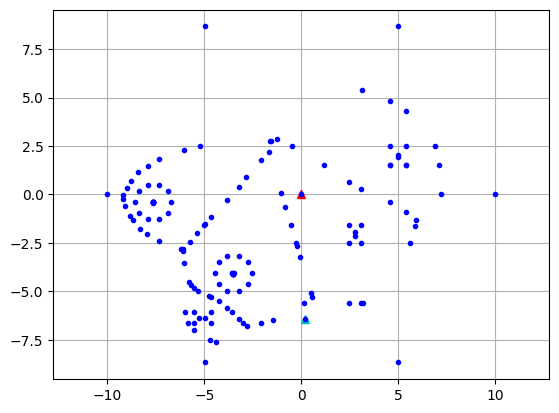

In [29]:
# start and goal position
sx = 0 # [m]
sy = 0  # [m]
gx = .18  # [m]
gy = -6.42  # [m]
robot_size = 0.353 # [m]

ox = []
oy = []

rx, ry = VoronoiRoadMapPlanner().planning(sx, sy, gx, gy, ox, oy,
                                          robot_size)

assert rx, 'Cannot found path'

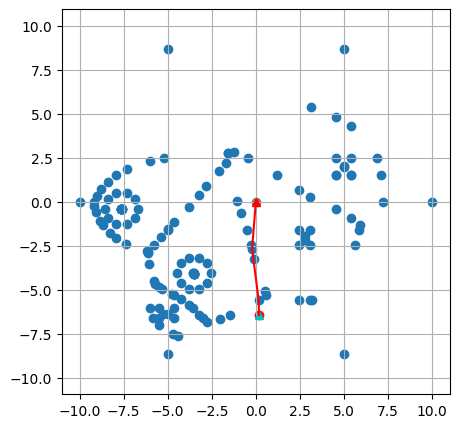

In [31]:
plt.figure(figsize=(5,5))
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.scatter(voronoi_points[...,0],voronoi_points[...,1])
plt.scatter(0,0,color='gray')
plt.scatter(.18,-6.42,color='red')
plt.plot(sx, sy, "^r")
plt.plot(gx, gy, "^c")
plt.grid(True)
plt.axis("equal")
plt.plot(rx, ry, "-r")
plt.pause(0.1)
plt.show()